In [61]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import optuna

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# With PCA

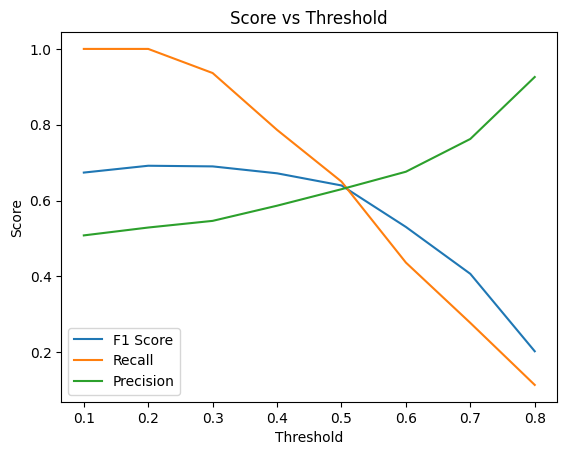

In [37]:
df = pd.read_csv("preprocessed.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

thresholds = np.arange(0.1, 0.9, 0.1)
logit_model = LogisticRegression()
logit_result = logit_model.fit(X_train, y_train)

scores, recalls, precisions = [], [], []

y_hat_prob = logit_model.predict_proba(X_test)[:, 1]

for thres in thresholds:
    y_hat = (y_hat_prob > thres).astype(int)
    scores.append(f1_score(y_test, y_hat))
    recalls.append(recall_score(y_test, y_hat))
    precisions.append(precision_score(y_test, y_hat))

plt.plot(thresholds, scores, label="F1 Score")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Score vs Threshold")
plt.show()

## Regularization

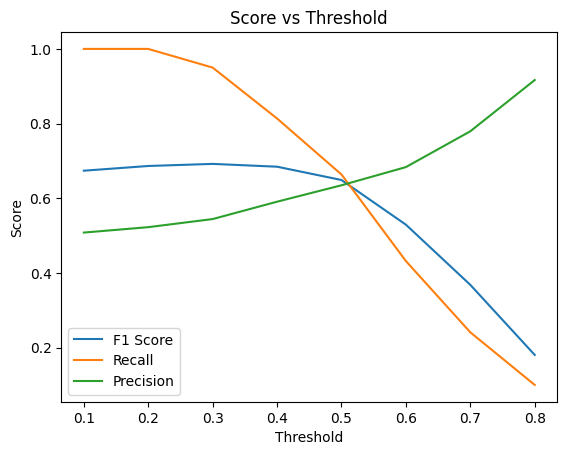

In [38]:

logit_model = LogisticRegression(penalty='l2', solver='liblinear', C=0.25)
logit_result = logit_model.fit(X_train, y_train)

scores, recalls, precisions = [], [], []

y_hat_prob = logit_model.predict_proba(X_test)[:, 1]

for thres in thresholds:
    y_hat = (y_hat_prob > thres).astype(int)
    scores.append(f1_score(y_test, y_hat))
    recalls.append(recall_score(y_test, y_hat))
    precisions.append(precision_score(y_test, y_hat))

plt.plot(thresholds, scores, label="F1 Score")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Score vs Threshold")
plt.show()

## Hyperparameter Tuning

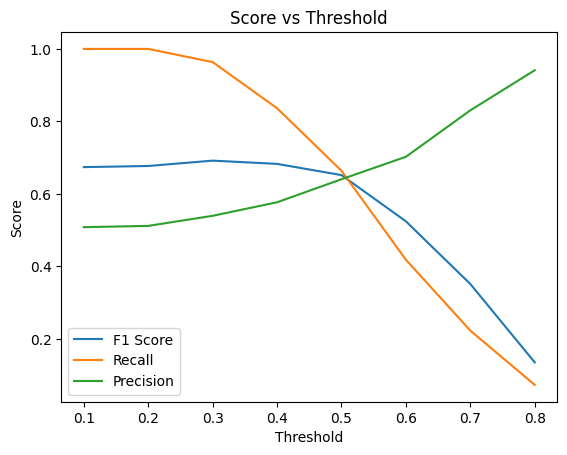

In [40]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(logit_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_logit_model = grid_search.best_estimator_

y_hat_prob = best_logit_model.predict_proba(X_test)[:, 1]

scores, recalls, precisions = [], [], []

for thres in thresholds:
    y_hat = (y_hat_prob > thres).astype(int)
    scores.append(f1_score(y_test, y_hat))
    recalls.append(recall_score(y_test, y_hat))
    precisions.append(precision_score(y_test, y_hat))

plt.plot(thresholds, scores, label="F1 Score")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Score vs Threshold")
plt.show()

# Without PCA

/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


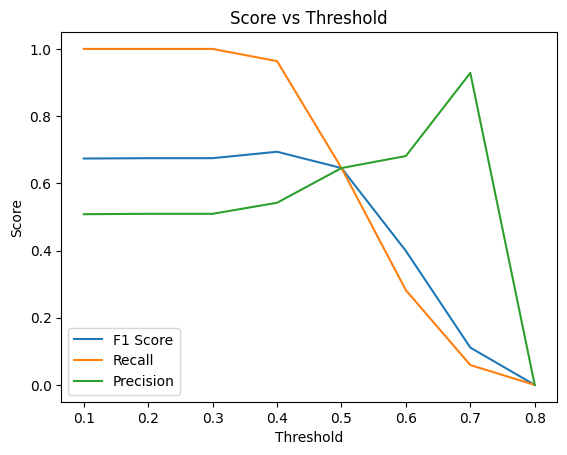

In [50]:
df = pd.read_csv("data_without_pca.csv")
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logit_model = LogisticRegression()
logit_result = logit_model.fit(X_train, y_train)

scores, recalls, precisions = [], [], []

y_hat_prob = logit_model.predict_proba(X_test)[:, 1]

for thres in thresholds:
    y_hat = (y_hat_prob > thres).astype(int)
    scores.append(f1_score(y_test, y_hat))
    recalls.append(recall_score(y_test, y_hat))
    precisions.append(precision_score(y_test, y_hat))

plt.plot(thresholds, scores, label="F1 Score")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Score vs Threshold")
plt.show()

## Regularization

/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


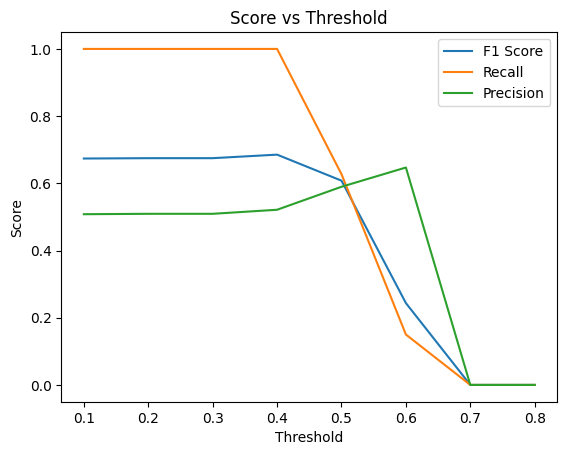

In [52]:
logit_model = LogisticRegression(penalty='l2', solver='liblinear', C=0.25)
logit_result = logit_model.fit(X_train, y_train)

scores, recalls, precisions = [], [], []

y_hat_prob = logit_model.predict_proba(X_test)[:, 1]

for thres in thresholds:
    y_hat = (y_hat_prob > thres).astype(int)
    scores.append(f1_score(y_test, y_hat))
    recalls.append(recall_score(y_test, y_hat))
    precisions.append(precision_score(y_test, y_hat))

plt.plot(thresholds, scores, label="F1 Score")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Score vs Threshold")
plt.show()

/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/williamlim/anaconda3/envs/machinelearning/lib/pyt

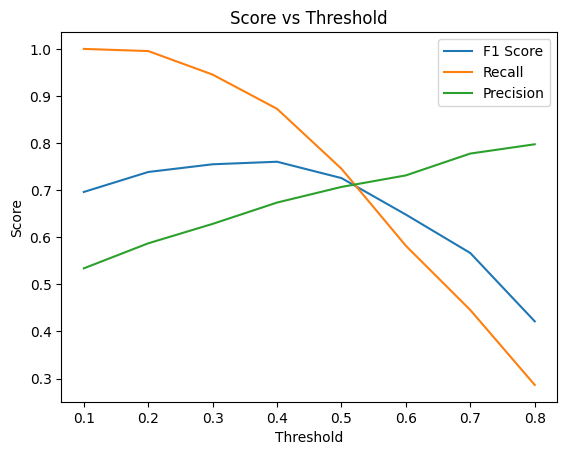

In [59]:
grid_search = GridSearchCV(LogisticRegression(
    max_iter=200), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_logit_model = grid_search.best_estimator_

y_hat_prob = best_logit_model.predict_proba(X_test)[:, 1]

scores, recalls, precisions = [], [], []

for thres in thresholds:
    y_hat = (y_hat_prob > thres).astype(int)
    scores.append(f1_score(y_test, y_hat))
    recalls.append(recall_score(y_test, y_hat))
    precisions.append(precision_score(y_test, y_hat))

plt.plot(thresholds, scores, label="F1 Score")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Score vs Threshold")
plt.show()

# With PCA, Optuna

In [73]:
df = pd.read_csv("preprocessed.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
def objective(trial):
    # penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical(
        'solver', ['liblinear', 'lbfgs', 'sag', 'saga'])
    C = trial.suggest_float('strength', 1e-5, 10, log=True)
    max_iter = trial.suggest_int('max-iter', 10, 100)
    logit_model = LogisticRegression(solver=solver, C=C, max_iter=max_iter)
    logit_result = logit_model.fit(X_train, y_train)
    y_hat_prob = logit_model.predict_proba(X_test)[:, 1]
    thres = trial.suggest_float('thres', 0.3, 0.6)
    y_hat = (y_hat_prob > thres).astype(int)
    return f1_score(y_test, y_hat)

In [77]:
study = optuna.create_study(
    study_name='logit_with_pca',
    storage='sqlite:///log.db',
    direction='maximize'
)
study.optimize(objective, n_trials=100, n_jobs=10)

[I 2024-05-21 14:27:42,621] A new study created in RDB with name: logit_with_pca
/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2024-05-21 14:27:42,807] Trial 1 finished with value: 0.0 and parameters: {'solver': 'liblinear', 'strength': 5.628488490689226e-05, 'max-iter': 24, 'thres': 0.5670535226556837}. Best is trial 3 with value: 0.6748466257668712.
[I 2024-05-21 14:27:42,809] Trial 6 finished with 

# Without PCA, Optuna

In [78]:
df = pd.read_csv("data_without_pca.csv")
X = df.iloc[:, 1:-1]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


def objective(trial):
    # penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical(
        'solver', ['liblinear', 'lbfgs', 'sag', 'saga'])
    C = trial.suggest_float('strength', 1e-5, 10, log=True)
    max_iter = trial.suggest_int('max-iter', 10, 100)
    logit_model = LogisticRegression(solver=solver, C=C, max_iter=max_iter)
    logit_result = logit_model.fit(X_train, y_train)
    y_hat_prob = logit_model.predict_proba(X_test)[:, 1]
    thres = trial.suggest_float('thres', 0.3, 0.6)
    y_hat = (y_hat_prob > thres).astype(int)
    return f1_score(y_test, y_hat)

In [79]:
study = optuna.create_study(
    study_name='logit_without_pca',
    storage='sqlite:///log.db',
    direction='maximize'
)
study.optimize(objective, n_trials=100, n_jobs=10)

[I 2024-05-21 15:31:38,744] A new study created in RDB with name: logit_without_pca
/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2024-05-21 15:31:38,967] Trial 5 finished with value: 0.7142857142857143 and parameters: {'solver': 'lbfgs', 'strength': 4.720356482071083, 'max-iter': 13, 'thres': 0.4880143805013634}. Best is trial 5 with value: 0.7142857142857143.
[I 2024-05-21 15:31:38,971] Trial 7 finished with value: 0.6063829787234043 and parameters: {'solver': 'liblinear', 'strength': 4.

# Tuning

In [82]:
df = pd.read_csv("data_without_pca.csv")
X = df.iloc[:, 1:-1]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


def objective(trial):
    solver = trial.suggest_categorical(
        'solver', ['liblinear', 'lbfgs', 'sag', 'saga'])
    C = trial.suggest_float('strength', 1e-5, 10, log=True)
    intercept = trial.suggest_categorical('intercept', [True, False])
    max_iter = trial.suggest_int('max-iter', 10, 100)
    logit_model = LogisticRegression(
        solver=solver, C=C, max_iter=max_iter, fit_intercept=intercept).fit(X_train, y_train)
    y_hat_prob = logit_model.predict_proba(X_test)[:, 1]
    thres = trial.suggest_float('thres', 0.3, 0.6)
    y_hat = (y_hat_prob > thres).astype(int)
    return f1_score(y_test, y_hat)

In [83]:
study = optuna.create_study(
    study_name='logit_fine',
    storage='sqlite:///log.db',
    direction='maximize'
)
study.optimize(objective, n_trials=1000, n_jobs=10)

[I 2024-05-21 15:38:22,179] A new study created in RDB with name: logit_fine
/Users/williamlim/anaconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2024-05-21 15:38:22,345] Trial 3 finished with value: 0.5754189944134078 and parameters: {'solver': 'lbfgs', 'strength': 7.3650625048461, 'intercept': True, 'max-iter': 51, 'thres': 0.5992043957030844}. Best is trial 5 with value: 0.6738131699846861.
[I 2024-05-21 15:38:22,366] Trial 5 finished with value: 0.6738131699846861 and parameters: {'solver': 'saga', 'strength': 4.151652938199341e-05, 'intercept': True, 'max-iter': 100, 'thres': 0.3745946432209538}. Best is trial 6 with value: 0.6832298136645962.
[I 2024-05-21 15:38:22,422] Trial 6 finished with value: 0.6832298136645962 and parameters: {'solver': 'sag', 'strength': 1.9841369932428619, 'intercept': True, 'max-iter': 76, 'thres': 0.32806435

# Final result

In [84]:
df = pd.read_csv("data_without_pca.csv")
X = df.iloc[:, 1:-1]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

solver = 'lbfgs'
C = 6.04
intercept = False
max_iter = 85
logit_model = LogisticRegression(
    solver=solver, C=C, max_iter=max_iter, fit_intercept=intercept).fit(X_train, y_train)
y_hat_prob = logit_model.predict_proba(X_test)[:, 1]
thres = 0.4174531114568097
y_hat = (y_hat_prob > thres).astype(int)
score = f1_score(y_test, y_hat)

In [85]:
score

0.7570621468926554

In [87]:
X.columns

Index(['l2_log', 'l3p_log', 'lpd_log', 'l3_log', 'w1_log', 'w2_log', 'w3_log'], dtype='object')

In [86]:
logit_model.coef_

array([[-16.63450269,  -0.0557261 ,   0.39484693,   0.16942692,
         13.69078605,   0.4613766 ,  12.73213866]])

In [88]:
coefficients = logit_model.coef_
feature_names = X.columns

coef_df = pd.DataFrame(coefficients, columns=feature_names)
print(coef_df)

      l2_log   l3p_log   lpd_log    l3_log     w1_log    w2_log     w3_log
0 -16.634503 -0.055726  0.394847  0.169427  13.690786  0.461377  12.732139
